In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)
    
    print "Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0]
    print "Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0]
    print "Est 2045 " + title + " Life expectancy: ", model.predict([[2045]])[0]
    
    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)
    plt.show()
    


In [6]:
X = pd.read_csv('life_expectancy.csv')
#print X
print X.head()
print X.describe()

   Year  WhiteMale  WhiteFemale  BlackMale  BlackFemale
0  1900       46.6         48.7       32.5         33.5
1  1950       66.5         72.2       59.1         62.9
2  1960       67.4         74.1       61.1         66.3
3  1970       68.0         75.6       60.0         68.3
4  1975       69.5         77.3       62.4         71.3
              Year  WhiteMale  WhiteFemale  BlackMale  BlackFemale
count    40.000000  40.000000    40.000000  40.000000    40.000000
mean   1991.250000  72.730000    78.592500  65.912500    73.262500
std      20.536085   4.968681     5.200561   6.422284     7.157592
min    1900.000000  46.600000    48.700000  32.500000    33.500000
25%    1984.750000  71.800000    78.700000  64.575000    73.400000
50%    1994.500000  73.350000    79.650000  65.250000    73.900000
75%    2004.250000  75.500000    80.500000  69.425000    76.125000
max    2014.000000  76.700000    81.400000  72.500000    78.400000


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
11 11
Est 2014 WhiteMale Life Expectancy:  80.8563542562
Est 2030 WhiteMale Life Expectancy:  85.3934938378
Est 2045 WhiteMale Life expectancy:  89.6470621955


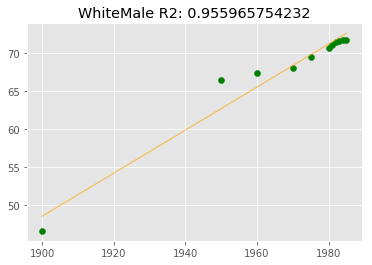

In [9]:
from sklearn import linear_model
model = linear_model.LinearRegression()

X_train = X.Year[X.Year < 1986]
y_train = X.WhiteMale[X.Year < 1986]

print type(y_train), type(X_train)
print len(X_train), len(y_train)

X_train = X_train.to_frame()
X_train

model.fit(X_train, y_train)
drawLine(model, X_train, y_train, "WhiteMale")


In [10]:
print "Actual 2014 WhiteMale life expectancy from loaded dataset:", X.WhiteMale[(X.Year == 2014)].values[0]

Actual 2014 WhiteMale life expectancy from loaded dataset: 76.7


In [13]:
y_train2 = X.BlackFemale(X.Year < 1986)
model2 = model.fit(X_train, y_train2)
drawLine(model2, X_train, y_train2, "BlackFemale")
print "Actual 2014 BlackFemale life expectancy from loaded dataset", X.BlackFemale[(X.Year == 2014)].values[0]


TypeError: 'Series' object is not callable

                 Year  WhiteMale  WhiteFemale  BlackMale  BlackFemale
Year         1.000000   0.974154     0.913907   0.960635     0.940429
WhiteMale    0.974154   1.000000     0.975164   0.987974     0.985009
WhiteFemale  0.913907   0.975164     1.000000   0.956689     0.994656
BlackMale    0.960635   0.987974     0.956689   1.000000     0.975922
BlackFemale  0.940429   0.985009     0.994656   0.975922     1.000000


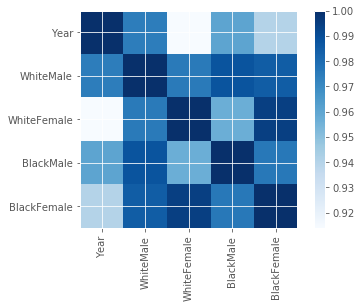

In [14]:
print X.corr()
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)

plt.show()